In [210]:
%matplotlib inline
import pandas as pd
import numpy as np
import sktda
import matplotlib.pyplot as plt
from ripser import ripser
from ripser import Rips
from persim import plot_diagrams

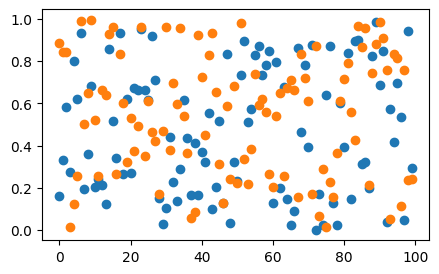

In [213]:
plt.figure(figsize=(5,3))
plt.plot(data, 'o')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = 90, verbose=True)


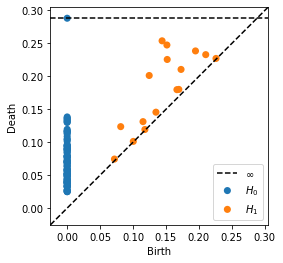

In [211]:
rips = Rips(n_perm= 90)
rips.metric_ = 'euclidean'
data = np.random.random((100,2))
diagrams = rips.fit_transform(data)
rips.plot(diagrams, size = 50)

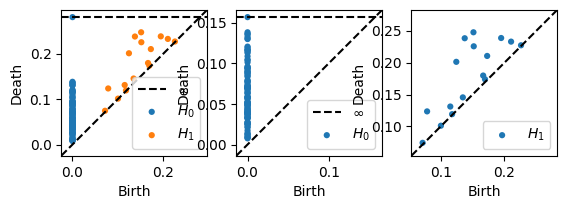

In [234]:
diagrams = ripser(data)['dgms']
plot_diagrams(diagrams, ax=plt.subplot(131))
plot_diagrams(diagrams, plot_only=[0], ax=plt.subplot(132))
plot_diagrams(diagrams, plot_only=[1], ax=plt.subplot(133))

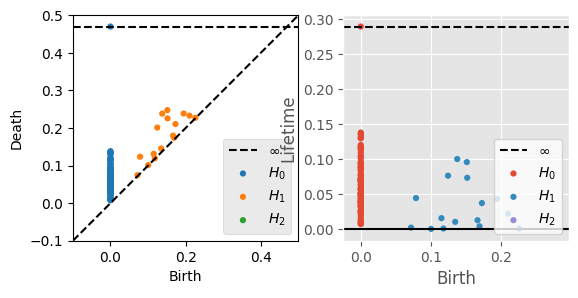

In [235]:
dgms = ripser(data, thresh=0.5, maxdim = 2)['dgms']
plot_diagrams(dgms, xy_range = [-0.1,0.5,-0.1, 0.5 ], colormap = 'ggplot', ax = plt.subplot(121))
plot_diagrams(dgms, lifetime = True, ax=plt.subplot(122))

In [217]:
from scipy import sparse
import time

In [218]:
N = 100 #The number of points
t = np.linspace(0, 5, N)
x = np.cos(2*np.pi*t) + t + np.cos(np.pi*t)
x4 = np.cos(2*np.pi*t + np.random.random_sample((N,))) + t +5*np.random.random_sample((N,)) + np.cos(np.pi*t)

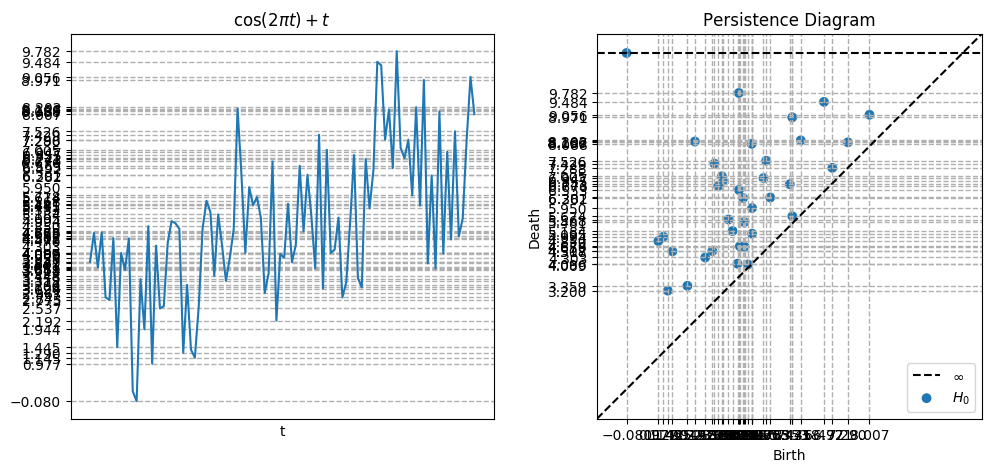

In [231]:
# Add edges between adjacent points in the time series, with the "distance"
# along the edge equal to the max value of the points it connects
I = np.arange(N-1)
J = np.arange(1, N)
V = np.maximum(x4[0:-1], x4[1::])
# Add vertex birth times along the diagonal of the distance matrix
I = np.concatenate((I, np.arange(N)))
J = np.concatenate((J, np.arange(N)))
V = np.concatenate((V, x4))
#Create the sparse distance matrix
D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
dgm0 = ripser(D, maxdim=0, distance_matrix=True)['dgms'][0]
dgm0 = dgm0[dgm0[:, 1]-dgm0[:, 0] > 1e-3, :]
allgrid = np.unique(dgm0.flatten())
allgrid = allgrid[allgrid < np.inf]
xs = np.unique(dgm0[:, 0])
ys = np.unique(dgm0[:, 1])
ys = ys[ys < np.inf]
#Plot the time series and the persistence diagram
plt.figure(figsize=(12, 5))
ylims = [-1, 12.5]
plt.subplot(121)
plt.plot(t, x4)
ax = plt.gca()
ax.set_yticks(allgrid)
ax.set_xticks([])
#plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plt.title("$\\cos(2 \pi t) + t$")
plt.xlabel("t")
plt.subplot(122)
ax = plt.gca()
ax.set_yticks(ys)
ax.set_xticks(xs)
plt.ylim(ylims)
plt.xlim(ylims)
plt.grid(linewidth=1, linestyle='--')
plot_diagrams(dgm0, size=50)
plt.title("Persistence Diagram")


plt.show()

In [229]:
import scipy
from scipy import ndimage
import PIL
from ripser import lower_star_img
cells_original = plt.imread("cells.jpg")
cells_grey = np.asarray(PIL.Image.fromarray(cells_original).convert('L'))

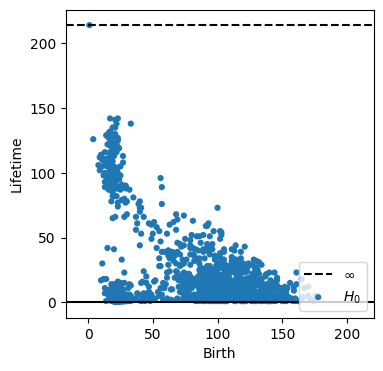

In [239]:
dgm = lower_star_img(-cells_grey)

plt.figure(figsize=(5, 4))
plot_diagrams(dgm, lifetime=True)
plt.show()

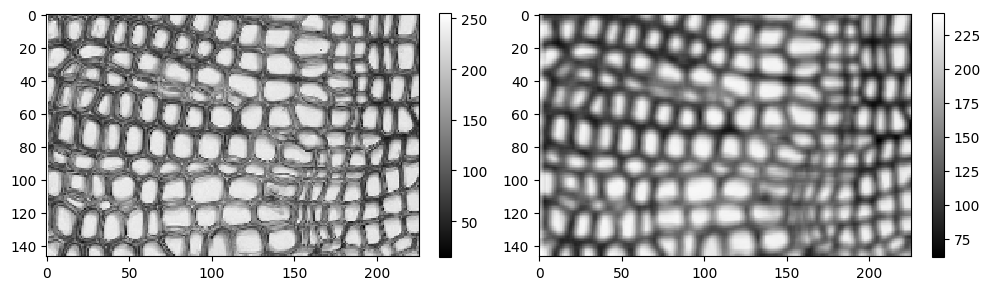

In [222]:
smoothed = ndimage.uniform_filter(cells_grey.astype(np.float64), size=5)
smoothed += 0.01 * np.random.randn(*smoothed.shape)
plt.figure(figsize=(10, 5))
plt.subplot(121)
im = plt.imshow(cells_grey, cmap='gray')
plt.colorbar(im, fraction=0.03)
plt.subplot(122)
im = plt.imshow(smoothed, cmap='gray')
plt.colorbar(im, fraction=0.03)
plt.tight_layout()
plt.show()

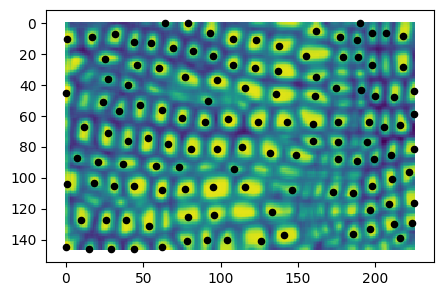

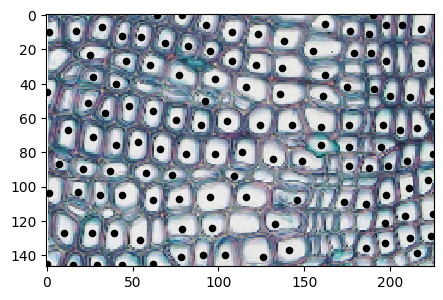

In [228]:
thresh = 70
idxs = np.arange(dgm.shape[0])
idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh]
#plt.subplot(121)
plt.figure(figsize=(5, 4))
plt.imshow(smoothed)
X, Y = np.meshgrid(np.arange(smoothed.shape[1]), np.arange(smoothed.shape[0]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, 'k')
plt.show()
#plt.subplot(122) 
plt.figure(figsize=(5, 4))

for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, 'k')
plt.imshow(cells_original)
plt.show()